### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [29]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [3]:
#all rows that contain NA or NaN values will be replaced with "Not Applicable" using the fillna() function
data = data.fillna("Not Applicable")
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [20]:
#using the value_counts() function on the "Y" column, we can determine the exact number of "1" results (accepted) and 
#divide this number with the total number of observations to determine the proportion of accepted coupons
proportion = data['Y'].value_counts()
ratio = proportion[1]/len(data['Y'])
print("Proportion of Coupons Accepted:", ratio)

Proportion of Coupons Accepted: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Count of Coupon Types')

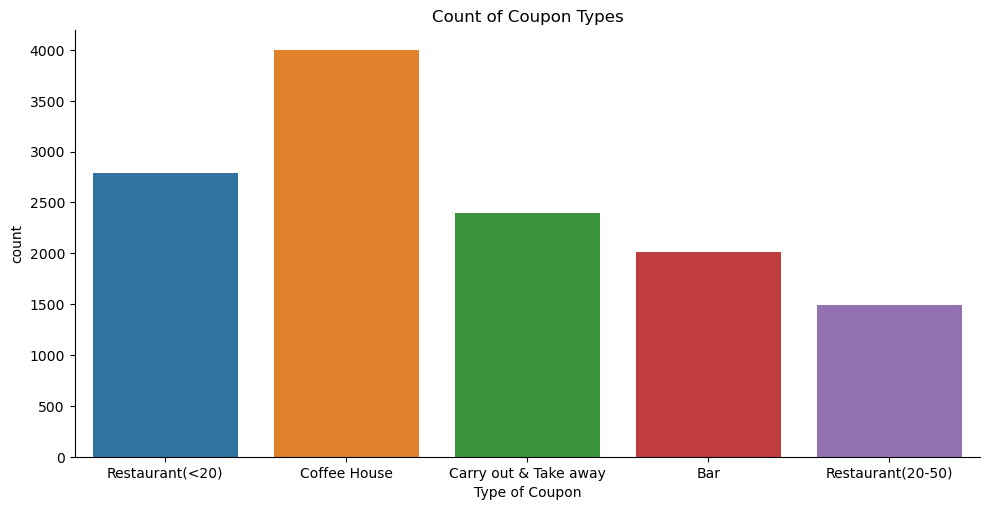

In [12]:
sns.catplot(data, x='coupon', kind='count', aspect=2)
plt.xlabel("Type of Coupon")
plt.title("Count of Coupon Types")

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

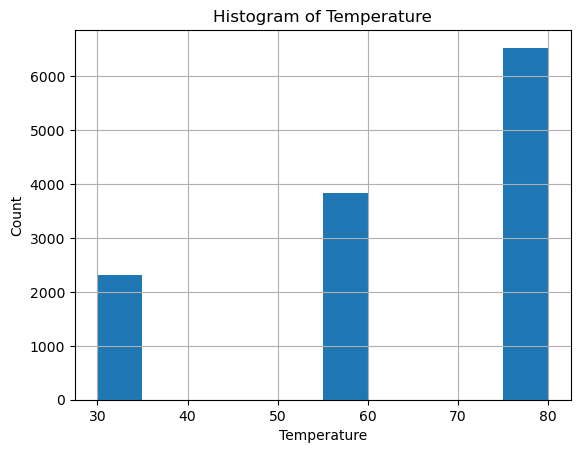

In [14]:
#sns.histplot(data, x="temperature")
data.hist("temperature")
plt.title("Histogram of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
#we can query the main dataframe and retrieve just the observations related to Bar coupons
df = data.query("coupon == 'Bar'")
df = df.reset_index()
df = df.drop(columns=['index'])
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,1,0,0,1,0
1,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,0,0,1,0,1
2,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,1,1,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2013,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2014,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2015,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [21]:
#using the new dataframe we just created, we can check how many of the Bar coupons were accepted and divide this value
#by the total number of Bar coupons to determine the proportion of accepted Bar coupons
coupons = df['Y'].value_counts()
coupons_size = df['Y'].count()
coupons_accepted_prop = coupons[1]/coupons_size
print("Proportion of Bar Coupons Accepted:", coupons_accepted_prop)

Proportion of Bar Coupons Accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


(array([0, 1]),
 [Text(0, 0, 'three_or_fewer_rate'), Text(1, 0, 'more_than_three_rate')])

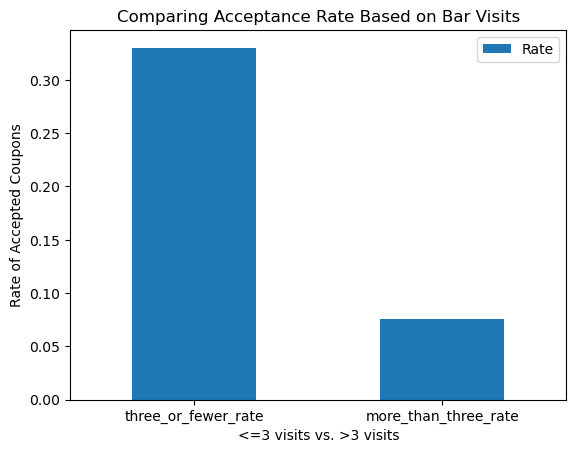

In [37]:
#Acceptance rates can be calculated by querying through the new dataframe and dividing by the total number of observations in the dataframe
three_or_fewer = df.query("Y == 1 and (Bar in ['1~3',  'less1', 'never'])")
more_than_three = df.query("Y == 1 and (Bar in ['4~8',  'gt8'])")
three_or_fewer_rate = three_or_fewer['Bar'].count()/df['Bar'].count()
more_than_three_rate = more_than_three['Bar'].count()/df['Bar'].count()

#construct the dataframe:
pb3 = pd.DataFrame({"A":["three_or_fewer_rate", "more_than_three_rate"], "Rate":[three_or_fewer_rate,more_than_three_rate]})

#Now we will use a function DataFrame.plot.bar() to display the two different rates in the form of a bar plot
pb3.plot.bar(x="A", y='Rate', xlabel="<=3 visits vs. >3 visits", ylabel= "Rate of Accepted Coupons", title = "Comparing Acceptance Rate Based on Bar Visits") 
plt.xticks(rotation=0)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance Rate for Conditions is: 
0.14476945959345563
Accepted Rate for Others is: 
0.26524541398116014


(array([0, 1]),
 [Text(0, 0, 'conditions_met_acceptance_rate'),
  Text(1, 0, 'other_acceptance_rate')])

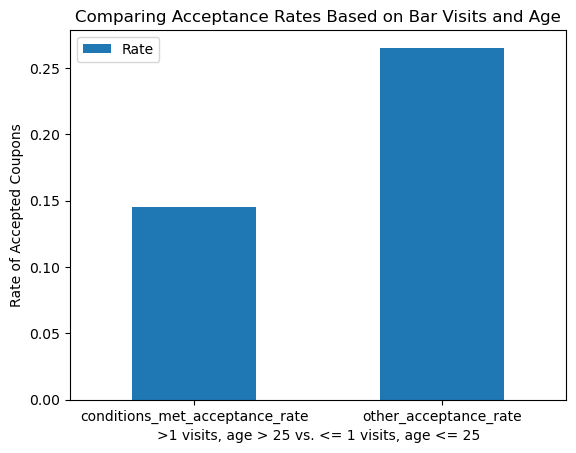

In [40]:
#For this problem, because there isn't a specific "more than once" option, the "1~3" option will be considered as part of the conditions
#Calculating the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25
conditions_met = df.query("Y == 1 and (Bar in ['1~3',  '4~8', 'gt8'] and age in ['46', '26', '31', '41', '50plus', '36'])")
conditions_met_count = conditions_met['coupon'].count()
conditions_met_acceptance_rate = conditions_met_count/df['Bar'].count()
print("Acceptance Rate for Conditions is: ") 
print(conditions_met_acceptance_rate)

#Calculating the acceptance rate for drivers that don't meet the conditions
accepted_coupons = df.query("Y==1")['coupon'].count()
other_count = accepted_coupons - conditions_met_count
other_acceptance_rate = other_count/df['Bar'].count()
print("Accepted Rate for Others is: ")
print(other_acceptance_rate)

#construct the dataframe:
pb4 = pd.DataFrame({"A":["conditions_met_acceptance_rate", "other_acceptance_rate"], "Rate":[conditions_met_acceptance_rate,other_acceptance_rate]})

#Now we will use a function DataFrame.plot.bar() to display the two different rates in the form of a bar plot
pb4.plot.bar(x="A", y='Rate', xlabel=">1 visits, age > 25 vs. <= 1 visits, age <= 25", ylabel= "Rate of Accepted Coupons", title="Comparing Acceptance Rates Based on Bar Visits and Age") 
plt.xticks(rotation=0)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Acceptance Rate for Conditions is: 
0.19484382746653445
Accepted Rate for Others is: 
0.2151710461080813


(array([0, 1]),
 [Text(0, 0, 'conditions_met_acceptance_rate'),
  Text(1, 0, 'other_acceptance_rate')])

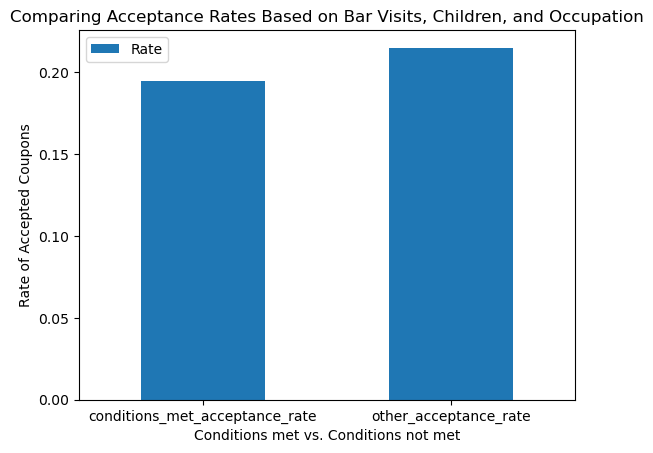

In [42]:
#Calculating the acceptance rate for drivers that meet the conditions
conditions_met = df.query("(Y == 1) and (passanger != 'Kid(s)') and (Bar in ['1~3',  '4~8', 'gt8']) and (occupation != 'FarmingFishing&Forestry')")
conditions_met_count = conditions_met['coupon'].count()
conditions_met_acceptance_rate = conditions_met_count/df['Bar'].count()
print("Acceptance Rate for Conditions is: ") 
print(conditions_met_acceptance_rate)

#Calculating the acceptance rate for drivers that don't meet the conditions
accepted_coupons = df.query("Y==1")['coupon'].count()
other_count = accepted_coupons - conditions_met_count
other_acceptance_rate = other_count/df['Bar'].count()
print("Accepted Rate for Others is: ")
print(other_acceptance_rate)

#construct the dataframe:
pb5 = pd.DataFrame({"A":["conditions_met_acceptance_rate", "other_acceptance_rate"], "Rate":[conditions_met_acceptance_rate,other_acceptance_rate]})

#Now we will use a function DataFrame.plot.bar() to display the two different rates in the form of a bar plot
pb5.plot.bar(x="A", y='Rate', xlabel="Conditions met vs. Conditions not met", ylabel= "Rate of Accepted Coupons", title="Comparing Acceptance Rates Based on Bar Visits, Children, and Occupation") 
plt.xticks(rotation=0)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance Rate for Conditions is: 
0.3956370847793753
Accepted Rate for Others is: 
0.014377788795240456


(array([0, 1]),
 [Text(0, 0, 'conditions_met_acceptance_rate'),
  Text(1, 0, 'other_acceptance_rate')])

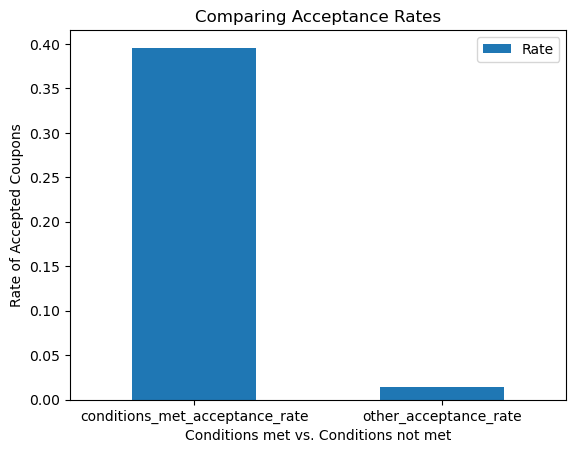

In [58]:
#Calculating the acceptance rate for drivers that meet the conditions
conditions_met_one = df.query("(Y == 1) and (passanger != 'Kid(s)') and (Bar in ['1~3',  '4~8', 'gt8']) and (maritalStatus != 'Widowed')")['coupon'].count()
conditions_met_two = df.query("(Y == 1) and (Bar in ['1~3',  '4~8', 'gt8']) and (age in ['21', '26', 'below21'])")['coupon'].count()
conditions_met_three = df.query("(Y == 1) and (RestaurantLessThan20 in ['4~8', 'gt8']) and (income in ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500'])")['coupon'].count()
conditions_met_acceptance_rate = (conditions_met_one+conditions_met_two+conditions_met_three)/df['Bar'].count()
print("Acceptance Rate for Conditions is: ") 
print(conditions_met_acceptance_rate)

#Calculating the acceptance rate for drivers that don't meet the conditions
accepted_coupons = df.query("Y==1")['coupon'].count()
conditions_met_count = conditions_met_one+conditions_met_two+conditions_met_three
other_count = accepted_coupons - conditions_met_count
other_acceptance_rate = other_count/df['Bar'].count()
print("Accepted Rate for Others is: ")
print(other_acceptance_rate)

#construct the dataframe:
pb6 = pd.DataFrame({"A":["conditions_met_acceptance_rate", "other_acceptance_rate"], "Rate":[conditions_met_acceptance_rate,other_acceptance_rate]})

#Now we will use a function DataFrame.plot.bar() to display the two different rates in the form of a bar plot
pb6.plot.bar(x="A", y='Rate', xlabel="Conditions met vs. Conditions not met", ylabel= "Rate of Accepted Coupons", title="Comparing Acceptance Rates") 
plt.xticks(rotation=0)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [47]:
#Based on the observations, I came up with the following hypotheses: 
#people without kid(s) have a higher chance of accepting the bar coupon
#people at the age of 25 or below have a higher chance of accepting the bar coupon
#people who visit the bar 3 times or less a month have a higher chance of accepting the bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [4]:
#With the bar coupon as an example, I would like to examine the coffee house coupons
#Create a new DataFrame containing Coffee House coupons
df_CHouse = data.query("coupon == 'Coffee House'")
df_CHouse = df_CHouse.reset_index()
df_CHouse = df_CHouse.drop(columns=['index'])
df_CHouse

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,0,0,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,1,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,1,0,0,1,0
3,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,1,0,0,1,1
4,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Not Applicable,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
3992,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
3993,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
3994,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


(array([0, 1]),
 [Text(0, 0, 'Accepted Coupons Rate'),
  Text(1, 0, 'Not Accepted Coupons Rate')])

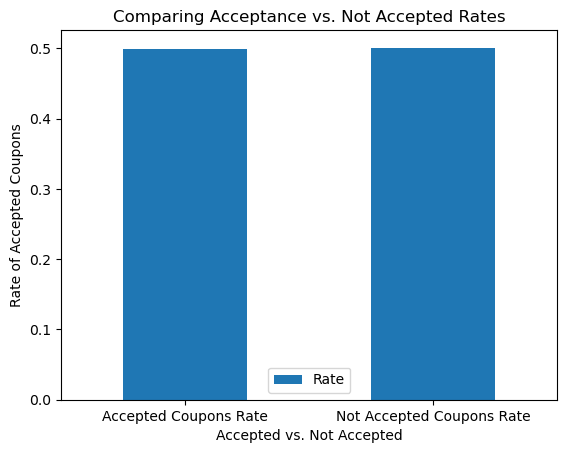

In [5]:
#Determine the proportion of accepted Coffee House coupons
accepted_coupons = df_CHouse.query("Y == 1")['coupon'].count()
accepted_coupons_rate = accepted_coupons/df_CHouse['coupon'].count()
not_accepted_coupons = df_CHouse['coupon'].count() - accepted_coupons
not_accepted_coupons_rate = not_accepted_coupons/df_CHouse['coupon'].count()

#construct the dataframe:
df_accepted = pd.DataFrame({"A":["Accepted Coupons Rate", "Not Accepted Coupons Rate"], "Rate":[accepted_coupons_rate, not_accepted_coupons_rate]})

#Now we will use a function DataFrame.plot.bar() to display the two different rates in the form of a bar plot
df_accepted.plot.bar(x="A", y='Rate', xlabel="Accepted vs. Not Accepted", ylabel= "Rate of Accepted Coupons", title="Comparing Acceptance vs. Not Accepted Rates") 
plt.xticks(rotation=0)

(array([0, 1]),
 [Text(0, 0, 'three_or_fewer_rate'), Text(1, 0, 'more_than_three_rate')])

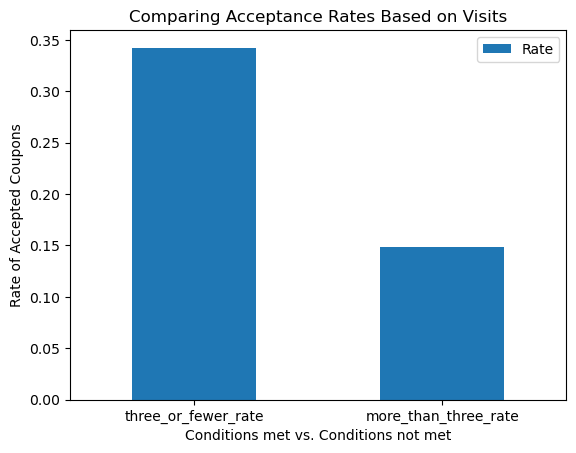

In [6]:
#Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

#Acceptance rates can be calculated by querying through the new dataframe and dividing by the total number of observations in the dataframe
three_or_fewer = df_CHouse.query("Y == 1 and (CoffeeHouse in ['1~3',  'less1', 'never'])")['CoffeeHouse'].count()
more_than_three = df_CHouse.query("Y == 1 and (CoffeeHouse in ['4~8',  'gt8'])")['CoffeeHouse'].count()
three_or_fewer_rate = three_or_fewer/df_CHouse['CoffeeHouse'].count()
more_than_three_rate = more_than_three/df_CHouse['CoffeeHouse'].count()

#construct the dataframe:
df_accepted = pd.DataFrame({"A":["three_or_fewer_rate", "more_than_three_rate"], "Rate":[three_or_fewer_rate, more_than_three_rate]})

#Now we will use a function DataFrame.plot.bar() to display the two different rates in the form of a bar plot
df_accepted.plot.bar(x="A", y='Rate', xlabel="Conditions met vs. Conditions not met", ylabel= "Rate of Accepted Coupons", title="Comparing Acceptance Rates Based on Visits") 
plt.xticks(rotation=0)

Acceptance Rate for Conditions is: 
0.21696696696696696
Accepted Rate for Others is: 
0.2822822822822823


(array([0, 1]),
 [Text(0, 0, 'conditions_met_acceptance_rate'),
  Text(1, 0, 'other_acceptance_rate')])

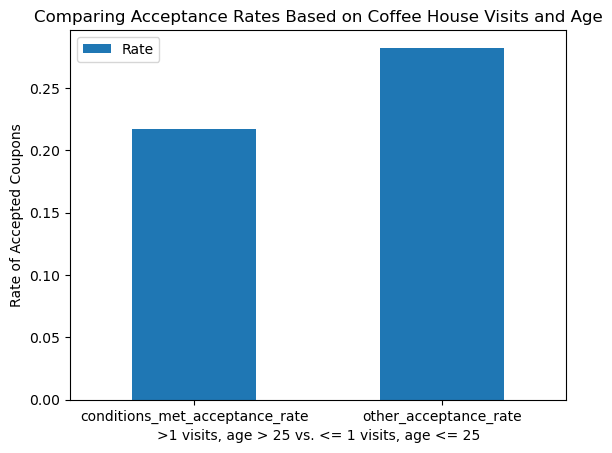

In [9]:
#Compare the acceptance rate between those who went to a coffee house more than once a month and are over the age of 25 to the all others
conditions_met = df_CHouse.query("Y == 1 and (CoffeeHouse in ['1~3',  '4~8', 'gt8'] and age in ['46', '26', '31', '41', '50plus', '36'])")
conditions_met_count = conditions_met['coupon'].count()
conditions_met_acceptance_rate = conditions_met_count/df_CHouse['CoffeeHouse'].count()
print("Acceptance Rate for Conditions is: ") 
print(conditions_met_acceptance_rate)

#Calculating the acceptance rate for drivers that don't meet the conditions
accepted_coupons = df_CHouse.query("Y==1")['coupon'].count()
other_count = accepted_coupons - conditions_met_count
other_acceptance_rate = other_count/df_CHouse['CoffeeHouse'].count()
print("Accepted Rate for Others is: ")
print(other_acceptance_rate)

#construct the dataframe:
df_accepted = pd.DataFrame({"A":["conditions_met_acceptance_rate", "other_acceptance_rate"], "Rate":[conditions_met_acceptance_rate,other_acceptance_rate]})

#Now we will use a function DataFrame.plot.bar() to display the two different rates in the form of a bar plot
df_accepted.plot.bar(x="A", y='Rate', xlabel=">1 visits, age > 25 vs. <= 1 visits, age <= 25", ylabel= "Rate of Accepted Coupons", title="Comparing Acceptance Rates Based on Coffee House Visits and Age") 
plt.xticks(rotation=0)

Acceptance Rate for Conditions is: 
0.21696696696696696
Accepted Rate for Others is: 
0.2822822822822823


(array([0, 1]),
 [Text(0, 0, 'conditions_met_acceptance_rate'),
  Text(1, 0, 'other_acceptance_rate')])

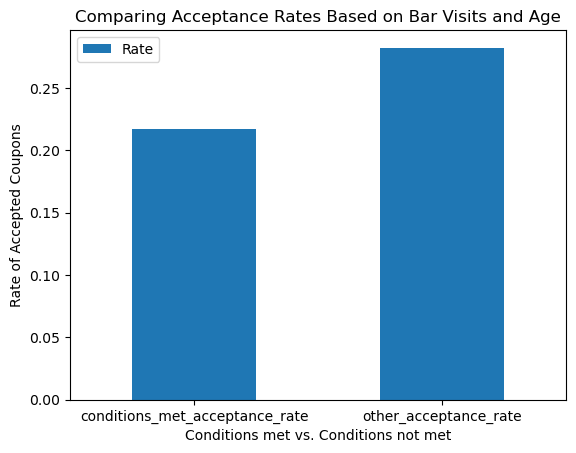

In [10]:
#Compare the acceptance rate between those who went to a coffee house more than once a month and had passengers that were not a kid
conditions_met = df_CHouse.query("(Y == 1) and (passanger != 'Kid(s)') and (Bar in ['1~3',  '4~8', 'gt8'])")['coupon'].count()
conditions_met_acceptance_rate = conditions_met_count/df_CHouse['CoffeeHouse'].count()
print("Acceptance Rate for Conditions is: ") 
print(conditions_met_acceptance_rate)

#Calculating the acceptance rate for drivers that don't meet the conditions
accepted_coupons = df_CHouse.query("Y==1")['coupon'].count()
other_count = accepted_coupons - conditions_met_count
other_acceptance_rate = other_count/df_CHouse['CoffeeHouse'].count()
print("Accepted Rate for Others is: ")
print(other_acceptance_rate)

#construct the dataframe:
df_accepted = pd.DataFrame({"A":["conditions_met_acceptance_rate", "other_acceptance_rate"], "Rate":[conditions_met_acceptance_rate,other_acceptance_rate]})

#Now we will use a function DataFrame.plot.bar() to display the two different rates in the form of a bar plot
df_accepted.plot.bar(x="A", y='Rate', xlabel="Conditions met vs. Conditions not met", ylabel= "Rate of Accepted Coupons", title="Comparing Acceptance Rates Based on Bar Visits and Age") 
plt.xticks(rotation=0)